# Chapter2. 퍼셉트론

In [4]:
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

### 2.1 퍼셉트론이란?

**퍼셉트론**

- 다수의 신호를 입력으로 받아 신호를 출력
- 신호가 흐른다(1)/흐르지 않는다(0)와 같이 두 가지 값만 가질 수 있음
- 입력신호가 뉴런에 보내질 때 각각 가중치가 곱해지는데, 가중치가 클 수록 영향력이 크다는 의미!
- 신호의 총 합이 임계값(세타)을 넘어설 때만 1을 출력
    

### 2.2 단순한 논리 회로

**① AND 게이트**

    입력이 모두 1일 때만 1을 출력하고, 그 외에는 0을 출력
    NAND는 그 반대!

**② OR 게이트**

    입력 신호 중 하나 이상이 1이면 1을 출력, 그 외에는 0을 출력

### 2.3 퍼셉트론 구현하기

#### 2.3.1 간단한 구현

In [2]:
def AND(x1, x2):
    
    w1, w2, theta = 0.5, 0.5, 0.7 # 함수 안에서 초기화
    tmp = x1*w1 + x2*w2
    
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [3]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


#### 2.3.2 가중치와 편향 도입

> 수식 'b + x1*w1 + x2*w2'에서 b는 **편향**, w1과 w2는 **가중치** / 합쳐서 가중치라고 할 때도 있음!

In [5]:
# AND 게이트

def AND(x1, x2):
    
    x = np.array([x1, x2]) # 입력
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.7 # 편향
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else:
        return 1

In [6]:
# NAND 게이트

def NAND(x1, x2):
    
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else:
        return 1

In [7]:
# OR 게이트

def OR(x1, x2):
    
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else:
        return 1

### 2.4 퍼셉트론의 한계

**XOR 게이트:** 둘 중 하나만 1인 경우 1을 출력

    퍼셉트론은 직선 하나로 출력값 별 영역을 나눠 표현할 수 없다는 한계가 있음!


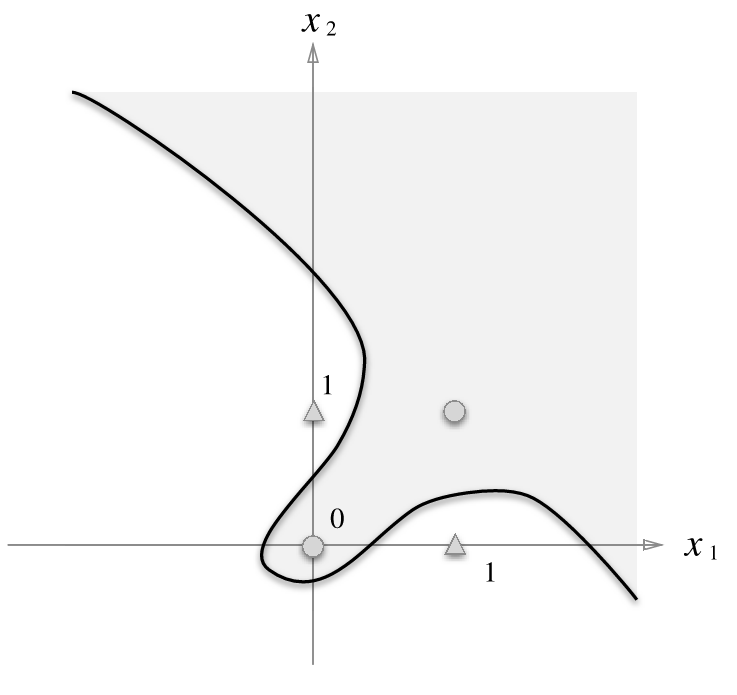

In [10]:
Image("image/limit.png")

=> XOR 게이트의 결과값에 대한 영역을 직선 하나로 나눌 수 없다. -> 비선형!

### 2.5 다층 퍼셉트론

#### 2.5.1 기존 게이트 조합하기

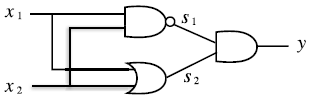

In [11]:
Image("image/comb_gate.png")

- 2층 퍼셉트론의 형태 ( 0층: x1,x2 / 1층: s1,s2 / 2층: y )
- XOR 게이트는 NAND(->s1), OR(->s2), AND(->y)게이트 순으로 조합해서 만들 수 있다!

#### 2.5.2 XOR 게이트 구현하기

In [12]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [13]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0
